In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [50]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras import optimizers
import pandas as pd
import itertools

In [51]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
60000
60000
10000
10000


[0 1 2 3 4 5 6 7 8 9] 
 Number of classes 10


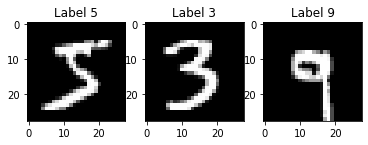

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

plt.subplot(1,3,1)
plt.imshow(x_train[0],cmap='gray')
plt.title('Label'+ ' ' + str(y_train[0]))
plt.subplot(1,3,2)
plt.imshow(x_train[10000],cmap='gray')
plt.title('Label'+ ' ' + str(y_train[10000]))
plt.subplot(1,3,3)
plt.imshow(x_test[6000],cmap='gray')
plt.title('Label'+ ' ' + str(y_test[6000]))

print('\n')
print(str(np.unique(y_train)) + ' \n ' + 'Number of classes' + ' ' + str(len(np.unique(y_train))))

In [53]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

laben = LabelEncoder()
y_train = laben.fit_transform(y_train) # This gives Label (Eg 3)
y_train = to_categorical(y_train,10) # Do One hot encoding (Eg [0,0,0,1,0....0])
y_test = laben.fit_transform(y_test) 
y_test = to_categorical(y_test,10) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('One hot Encoded', y_train[11000])
print('One hot Encoded', y_test[9000])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
One hot Encoded [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
One hot Encoded [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [54]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))	
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)         

In [56]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [57]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [58]:
history = model.fit(x_train, y_train,
                   epochs = 50,
                   validation_split=0.2,
                   batch_size=32,
                    callbacks = callbacks
                   )
model.save('/kaggle/working/model_1.h5')

Epoch 1/50
1490/1500 [============================>.] - ETA: 0s - loss: 0.4554 - accuracy: 0.8549
Epoch 00001: val_loss improved from inf to 0.10710, saving model to /kaggle/working/model.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4530 - accuracy: 0.8557 - val_loss: 0.1071 - val_accuracy: 0.9678
Epoch 2/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9597
Epoch 00002: val_loss improved from 0.10710 to 0.06856, saving model to /kaggle/working/model.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1326 - accuracy: 0.9597 - val_loss: 0.0686 - val_accuracy: 0.9803
Epoch 3/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.0921 - accuracy: 0.9708
Epoch 00003: val_loss improved from 0.06856 to 0.05780, saving model to /kaggle/working/model.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0920 - accuracy: 0.9708 - val_loss: 0.0578 - val_accuracy: 0.9817
Epoch 4/50
1498/1500

Epoch 28/50
1490/1500 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9907
Epoch 00028: val_loss did not improve from 0.02854
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0333 - val_accuracy: 0.9918
Epoch 29/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.0328 - accuracy: 0.9910
Epoch 00029: val_loss improved from 0.02854 to 0.02826, saving model to /kaggle/working/model.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.0283 - val_accuracy: 0.9921
Epoch 30/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9904
Epoch 00030: val_loss did not improve from 0.02826
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0318 - val_accuracy: 0.9910
Epoch 31/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.0328 - accuracy: 0.9901
Epoch 

In [59]:
Score = model.evaluate(x_test,y_test)
print(' Test Accuracy ', Score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0365 - accuracy: 0.9903
 Test Accuracy  0.9902999997138977


In [60]:
y_test_ = np.argmax(y_test, axis=1)
y_pred_ = model.predict_classes(x_test)

In [63]:
print('Classification Report \n')
print(classification_report(y_test_, y_pred_, target_names = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9','Class_10',]))

Classification Report 

              precision    recall  f1-score   support

     Class_1       0.99      1.00      1.00       980
     Class_2       1.00      0.99      1.00      1135
     Class_3       0.99      1.00      0.99      1032
     Class_4       0.97      1.00      0.98      1010
     Class_5       1.00      0.99      0.99       982
     Class_6       0.99      0.98      0.99       892
     Class_7       1.00      0.98      0.99       958
     Class_8       1.00      0.98      0.99      1028
     Class_9       0.99      1.00      0.99       974
    Class_10       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



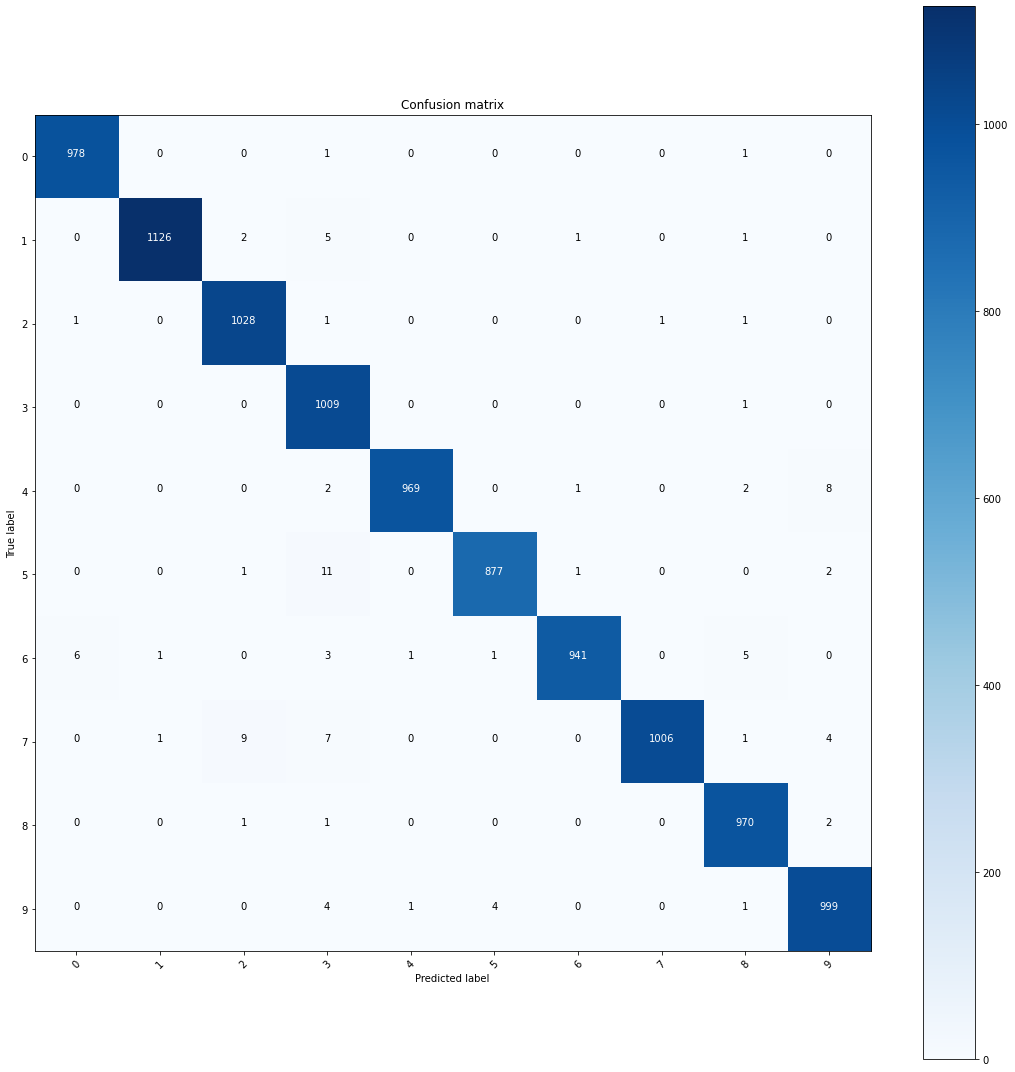

In [64]:
plt.figure(figsize=(8,8))

classes = 10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 